In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow.keras as ak
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import process
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [2]:
novadrive = pd.read_csv('novadrivebank.csv')
novadrive

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,idade,dependentes,estadocivil,score,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24,58660,Outros,Ens.Médio,57,0,Solteiro,MuitoBom,VoyageRoamer,84623.0,350000.0,bom
1,Empresário,21,46557,Outros,Ens.Médio,36,2,Víuvo,MuitoBom,EcoPrestige,126855.0,500000.0,bom
2,Dentista,13,43939,Própria,Ens.Médio,22,0,Casado,Bom,DoubleDuty,127151.0,320000.0,ruim
3,Engenheiro,10,37262,Própria,Superior,35,0,Divorciado,Baixo,AgileXplorer,28767.0,250000.0,bom
4,Contador,6,52606,Própria,PósouMais,26,0,Casado,Justo,TrailConqueror,199564.0,400000.0,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Médico,36,47480,Própria,Superior,63,0,Divorciado,Bom,SpeedFury,217011.0,800000.0,bom
146,Advogado,39,20860,Alugada,Ens.Fundamental,36,0,Víuvo,Bom,DoubleDuty,139244.0,320000.0,ruim
147,Arquiteto,26,31394,Própria,PósouMais,53,1,Divorciado,MuitoBom,ElegantCruise,107035.0,300000.0,ruim
148,Médico,19,39769,NaN,Ens.Médio,63,0,Solteiro,Baixo,VoyageRoamer,54520.0,350000.0,bom


In [3]:
novadrive['idade'] = novadrive['idade'].astype(int)
novadrive['valortotalbem'] = novadrive['valortotalbem'].astype(float)
novadrive['valorsolicitado'] = novadrive['valorsolicitado'].astype(float)

In [4]:
variaveis_categoricas = ['profissao', 'tiporesidencia', 'escolaridade', 'estadocivil', 'score', 'produto']
variaveis_numericas = ['tempoprofissao', 'renda', 'idade', 'dependentes', 'valorsolicitado', 'valortotalbem']

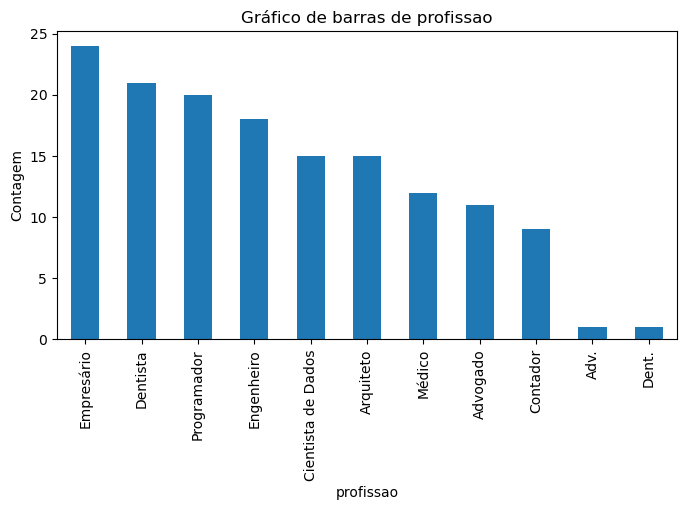

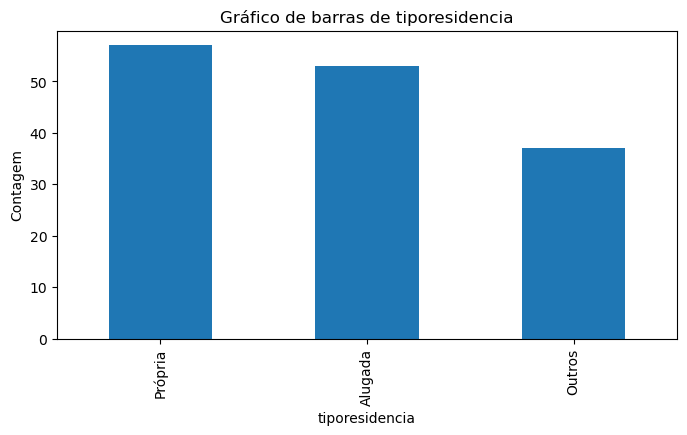

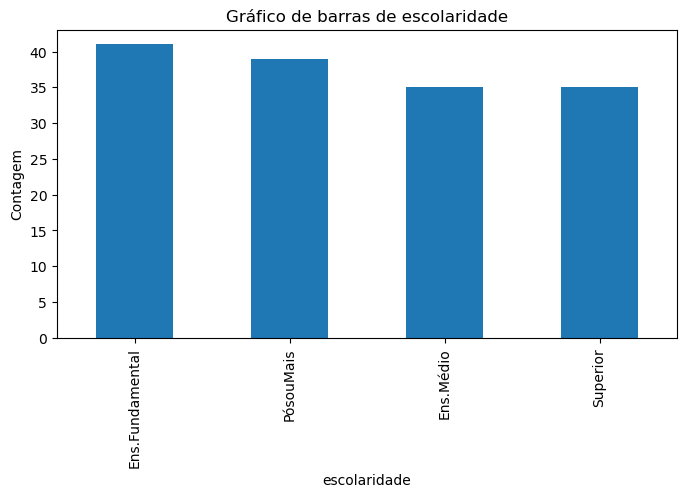

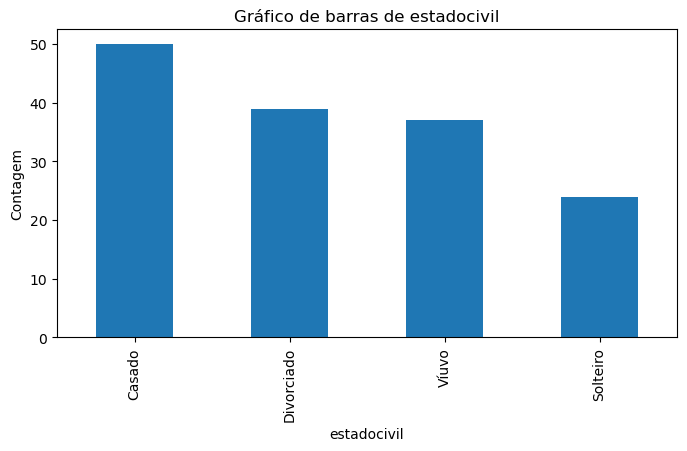

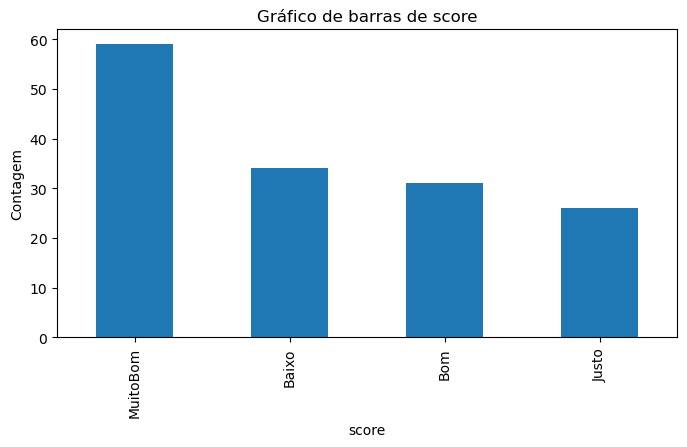

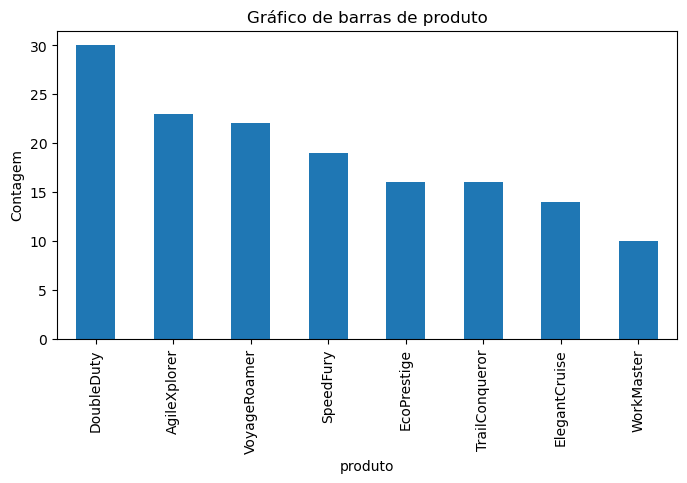

In [5]:
for colunas in variaveis_categoricas:
    novadrive[colunas].value_counts().plot(kind = 'bar', figsize=(8,4))
    plt.title(f"Gráfico de barras de {colunas}")
    plt.ylabel("Contagem")
    plt.show()

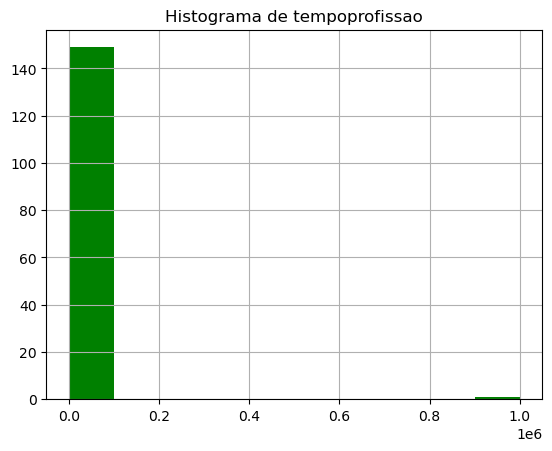

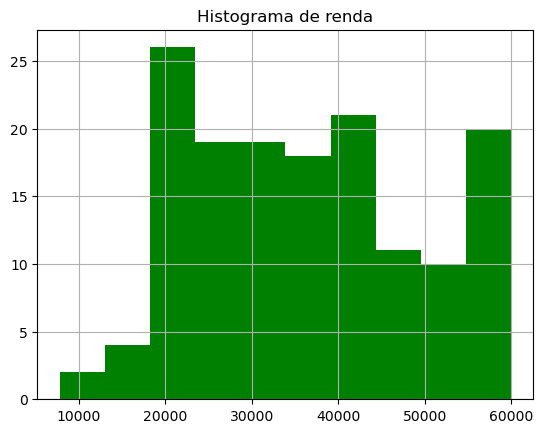

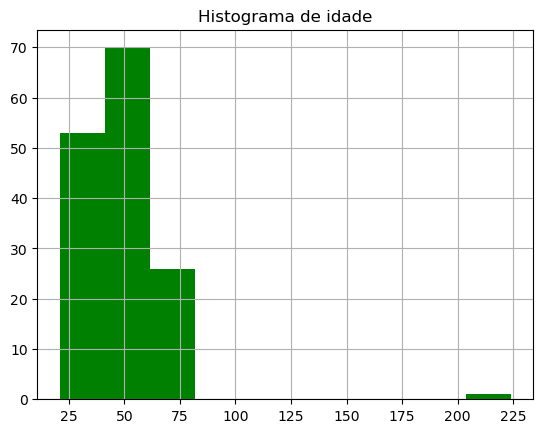

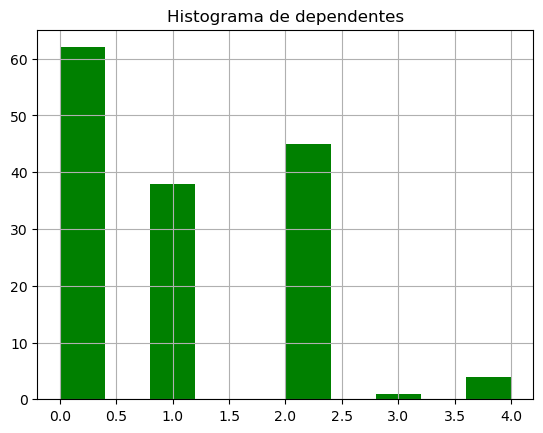

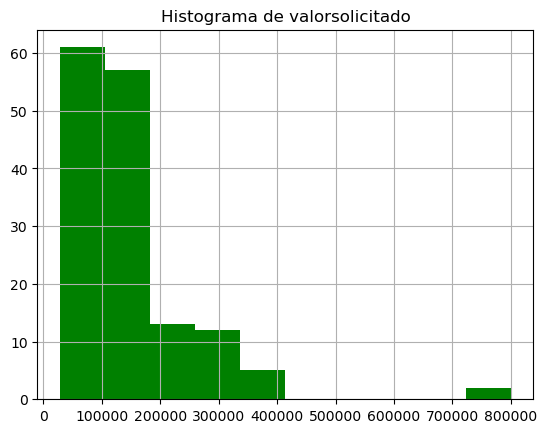

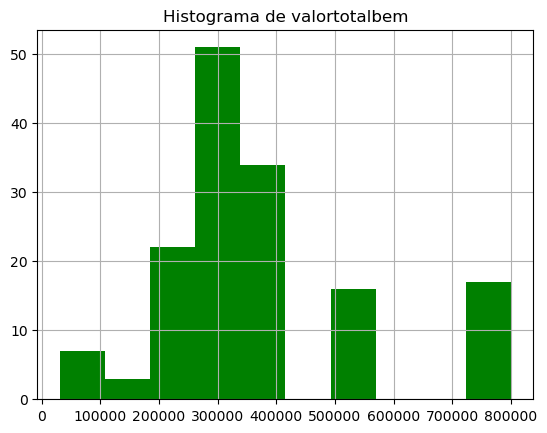

In [6]:
for colunas in variaveis_numericas:
    novadrive[colunas].hist(bins = 10, color = 'green')
    plt.title(f"Histograma de {colunas}")
    plt.show()

In [7]:
def substitui_nulos(df):
    for colunas in variaveis_categoricas:
        moda = df[colunas].mode()[0]
        df[colunas].fillna(moda, inplace = True)
    
    else:
        for colunas in variaveis_numericas:
            mediana = df[colunas].median()
            df[colunas].fillna(mediana, inplace = True)
            
    return df

In [8]:
substitui_nulos(novadrive)

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,idade,dependentes,estadocivil,score,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24,58660,Outros,Ens.Médio,57,0,Solteiro,MuitoBom,VoyageRoamer,84623.0,350000.0,bom
1,Empresário,21,46557,Outros,Ens.Médio,36,2,Víuvo,MuitoBom,EcoPrestige,126855.0,500000.0,bom
2,Dentista,13,43939,Própria,Ens.Médio,22,0,Casado,Bom,DoubleDuty,127151.0,320000.0,ruim
3,Engenheiro,10,37262,Própria,Superior,35,0,Divorciado,Baixo,AgileXplorer,28767.0,250000.0,bom
4,Contador,6,52606,Própria,PósouMais,26,0,Casado,Justo,TrailConqueror,199564.0,400000.0,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Médico,36,47480,Própria,Superior,63,0,Divorciado,Bom,SpeedFury,217011.0,800000.0,bom
146,Advogado,39,20860,Alugada,Ens.Fundamental,36,0,Víuvo,Bom,DoubleDuty,139244.0,320000.0,ruim
147,Arquiteto,26,31394,Própria,PósouMais,53,1,Divorciado,MuitoBom,ElegantCruise,107035.0,300000.0,ruim
148,Médico,19,39769,Própria,Ens.Médio,63,0,Solteiro,Baixo,VoyageRoamer,54520.0,350000.0,bom


In [9]:
novadrive.isnull().sum()

profissao          0
tempoprofissao     0
renda              0
tiporesidencia     0
escolaridade       0
idade              0
dependentes        0
estadocivil        0
score              0
produto            0
valorsolicitado    0
valortotalbem      0
classe             0
dtype: int64

In [10]:
            
def corrigir_erros_digitacao(df, colunas, lista_valida):
    for i, valor in enumerate(df[colunas]):
        valor_str = str(valor) if pd.notnull(valor) else valor
        
        
        if valor_str not in lista_valida and pd.notnull(valor_str):
            correcao = process.extractOne(valor_str, lista_valida)[0]
            df.at[i, colunas] = correcao
            
    return df

def tratar_outliers(df, coluna, minimo, maximo):
    mediana = df[(df[coluna] >= minimo) & (df[coluna] <= maximo)][coluna].median()
    df[coluna] = df[coluna].apply(lambda x: mediana if x < minimo or x > maximo else x)
    
    return df
    
def save_scalers(df,nome_colunas):
    for colunas in nome_colunas:
        scaler = StandardScaler()
        df[colunas] = scaler.fit_transform(df[[colunas]])
        joblib.dump(scaler,f'./objects/scalers{colunas}.joblib')
    
    
def save_encoders(df, nome_colunas):
    for colunas in nome_colunas:
        encoder = LabelEncoder()
        df[colunas] = encoder.fit_transform(df[colunas])
        joblib.dump(encoder, f'objects\labelencoder{colunas}.joblib')
        
    return df

In [11]:
tratar_outliers(novadrive, 'tempoprofissao', 0, 70)
tratar_outliers(novadrive, 'idade', 0, 110)

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,idade,dependentes,estadocivil,score,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24.0,58660,Outros,Ens.Médio,57.0,0,Solteiro,MuitoBom,VoyageRoamer,84623.0,350000.0,bom
1,Empresário,21.0,46557,Outros,Ens.Médio,36.0,2,Víuvo,MuitoBom,EcoPrestige,126855.0,500000.0,bom
2,Dentista,13.0,43939,Própria,Ens.Médio,22.0,0,Casado,Bom,DoubleDuty,127151.0,320000.0,ruim
3,Engenheiro,10.0,37262,Própria,Superior,35.0,0,Divorciado,Baixo,AgileXplorer,28767.0,250000.0,bom
4,Contador,6.0,52606,Própria,PósouMais,26.0,0,Casado,Justo,TrailConqueror,199564.0,400000.0,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Médico,36.0,47480,Própria,Superior,63.0,0,Divorciado,Bom,SpeedFury,217011.0,800000.0,bom
146,Advogado,39.0,20860,Alugada,Ens.Fundamental,36.0,0,Víuvo,Bom,DoubleDuty,139244.0,320000.0,ruim
147,Arquiteto,26.0,31394,Própria,PósouMais,53.0,1,Divorciado,MuitoBom,ElegantCruise,107035.0,300000.0,ruim
148,Médico,19.0,39769,Própria,Ens.Médio,63.0,0,Solteiro,Baixo,VoyageRoamer,54520.0,350000.0,bom


In [12]:
print(novadrive['idade'].describe(), '\n' )
print(novadrive['tempoprofissao'].describe())

count    150.000000
mean      46.086667
std       13.810285
min       21.000000
25%       35.000000
50%       46.000000
75%       57.000000
max       70.000000
Name: idade, dtype: float64 

count    150.000000
mean      22.900000
std       11.114867
min        0.000000
25%       13.000000
50%       24.000000
75%       32.000000
max       40.000000
Name: tempoprofissao, dtype: float64


In [13]:
corrigir_erros_digitacao(novadrive,'profissao', ['Empresário','Dentista', 'Programador', 'Engenheiro', 'Cientista de Dados', 'Arquiteto', 'Médico', 'Advogado', 'Contador'])
print(novadrive['profissao'].value_counts())

profissao
Empresário            27
Dentista              22
Programador           20
Engenheiro            18
Cientista de Dados    15
Arquiteto             15
Advogado              12
Médico                12
Contador               9
Name: count, dtype: int64


In [14]:
save_encoders(novadrive, ['profissao', 'tiporesidencia', 'escolaridade', 'estadocivil', 'score', 'produto'])

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,idade,dependentes,estadocivil,score,produto,valorsolicitado,valortotalbem,classe
0,2,24.0,58660,1,1,57.0,0,2,3,6,84623.0,350000.0,bom
1,5,21.0,46557,1,1,36.0,2,3,3,2,126855.0,500000.0,bom
2,4,13.0,43939,2,1,22.0,0,0,1,1,127151.0,320000.0,ruim
3,6,10.0,37262,2,3,35.0,0,1,0,0,28767.0,250000.0,bom
4,3,6.0,52606,2,2,26.0,0,0,2,5,199564.0,400000.0,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,7,36.0,47480,2,3,63.0,0,1,1,4,217011.0,800000.0,bom
146,0,39.0,20860,0,0,36.0,0,3,1,1,139244.0,320000.0,ruim
147,1,26.0,31394,2,2,53.0,1,1,3,3,107035.0,300000.0,ruim
148,7,19.0,39769,2,1,63.0,0,2,0,6,54520.0,350000.0,bom


In [15]:
save_scalers(novadrive, ['renda', 'tempoprofissao', 'idade', 'valorsolicitado', 'valortotalbem'])
novadrive

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,idade,dependentes,estadocivil,score,produto,valorsolicitado,valortotalbem,classe
0,2,0.099298,1.720923,1,1,0.792880,0,2,3,6,-0.527510,-0.141094,bom
1,5,-0.171515,0.784952,1,1,-0.732820,2,3,3,2,-0.155529,0.700017,bom
2,4,-0.893683,0.582492,2,1,-1.749954,0,0,1,1,-0.152922,-0.309316,ruim
3,6,-1.164496,0.066135,2,3,-0.805473,0,1,0,0,-1.019491,-0.701834,bom
4,3,-1.525580,1.252744,2,2,-1.459344,0,0,2,5,0.484893,0.139277,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,7,1.182550,0.856331,2,3,1.228794,0,1,1,4,0.638567,2.382239,bom
146,0,1.453363,-1.202294,0,0,-0.732820,0,3,1,1,-0.046407,-0.309316,ruim
147,1,0.279840,-0.387660,2,2,0.502270,1,1,3,3,-0.330104,-0.421464,ruim
148,7,-0.352057,0.260011,2,1,1.228794,0,2,0,6,-0.792658,-0.141094,bom


In [16]:
y = novadrive['classe']
x = novadrive.drop('classe', axis = 1)

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 10)
len(x_treino)                   

105

In [18]:
mapeamento = {'ruim' : 0, 'bom' : 1}
y_treino = np.array([mapeamento[item] for item in y_treino])
y_teste = np.array([mapeamento[item] for item in y_teste])

In [98]:
modelo = ak.Sequential([ak.layers.Dense(units = 10, activation = 'relu', input_shape=(x_treino.shape[1],)),
                       ak.layers.Dropout(0.2),
                       ak.layers.Dense(units = 8, activation = 'relu'),
                       ak.layers.Dropout(0.2),
                       ak.layers.Dense(units = 6, activation = 'relu'),
                       ak.layers.Dropout(0.2),
                       ak.layers.Dense(units = 1, activation = 'sigmoid')])

optimizer = ak.optimizers.Adam(learning_rate = 0.001)
modelo.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\roni_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.fit(x_treino, y_treino, validation_split = 0.2, batch_size = 10, epochs =300, verbose = 1)

In [102]:
avaliacao = modelo.evaluate(x_teste, y_teste)
print("Avaliação de modelo:", avaliacao)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 0.5978 
Avaliação de modelo: [0.5743922591209412, 0.800000011920929]


In [104]:
previsoes = modelo.predict(x_teste)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [106]:
previsoes = (previsoes > 0.5)
confusao = confusion_matrix(y_teste, previsoes)
acuracia = accuracy_score(y_teste, previsoes)
print(f'Acurácia: {acuracia} \n Matriz de Confusão: \n {confusao}')

Acurácia: 0.8 
 Matriz de Confusão: 
 [[13  4]
 [ 5 23]]
